In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [100]:
logit_Data = pd.read_excel('C:/Users/kobalaji/Desktop/LetsUpgrade AI-ML/Day 21/dataset/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data') 

In [101]:
logit_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [102]:
logit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [103]:
logit_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [105]:
logit_Data[logit_Data['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [106]:
indexNames = logit_Data[logit_Data['Experience']<0].index

In [107]:
logit_Data.drop(indexNames , inplace=True)

In [108]:
logit_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.0000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.9359,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.7477,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.7000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.5000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.6000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.0000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
logit_Data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [110]:
cols = ['ID','ZIP Code']

In [111]:
logit_Data.drop(cols,axis=1,inplace=True)

In [112]:
logit_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
Age                   4948 non-null int64
Experience            4948 non-null int64
Income                4948 non-null int64
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Mortgage              4948 non-null int64
Personal Loan         4948 non-null int64
Securities Account    4948 non-null int64
CD Account            4948 non-null int64
Online                4948 non-null int64
CreditCard            4948 non-null int64
dtypes: float64(1), int64(11)
memory usage: 502.5 KB


In [113]:
logit_Data.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

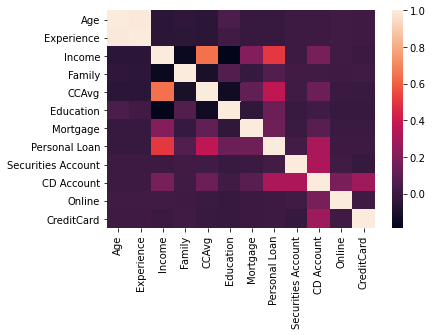

In [114]:
sns.heatmap(logit_Data.corr())

<AxesSubplot:>

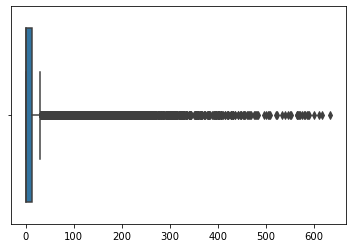

In [115]:
sns.boxplot(logit_Data)

<AxesSubplot:>

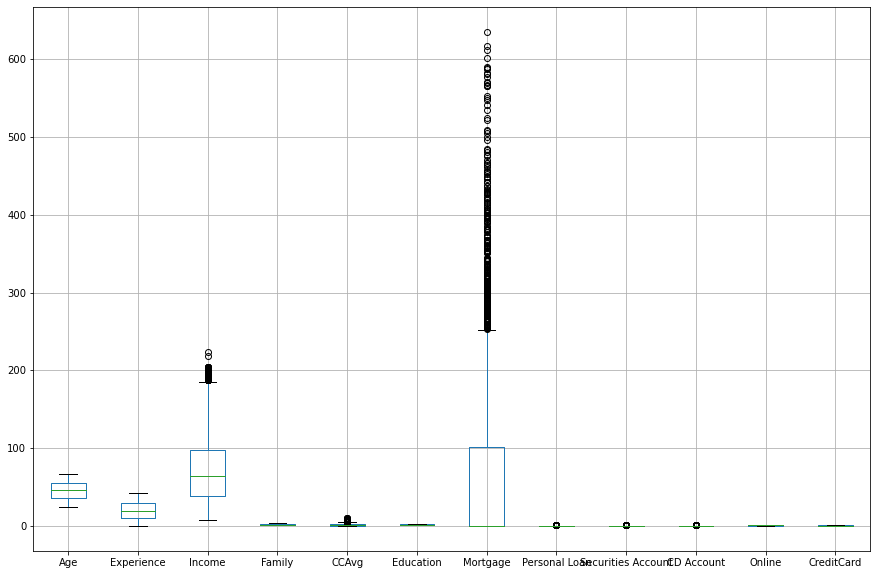

In [116]:
logit_Data.boxplot(figsize=(15,10))

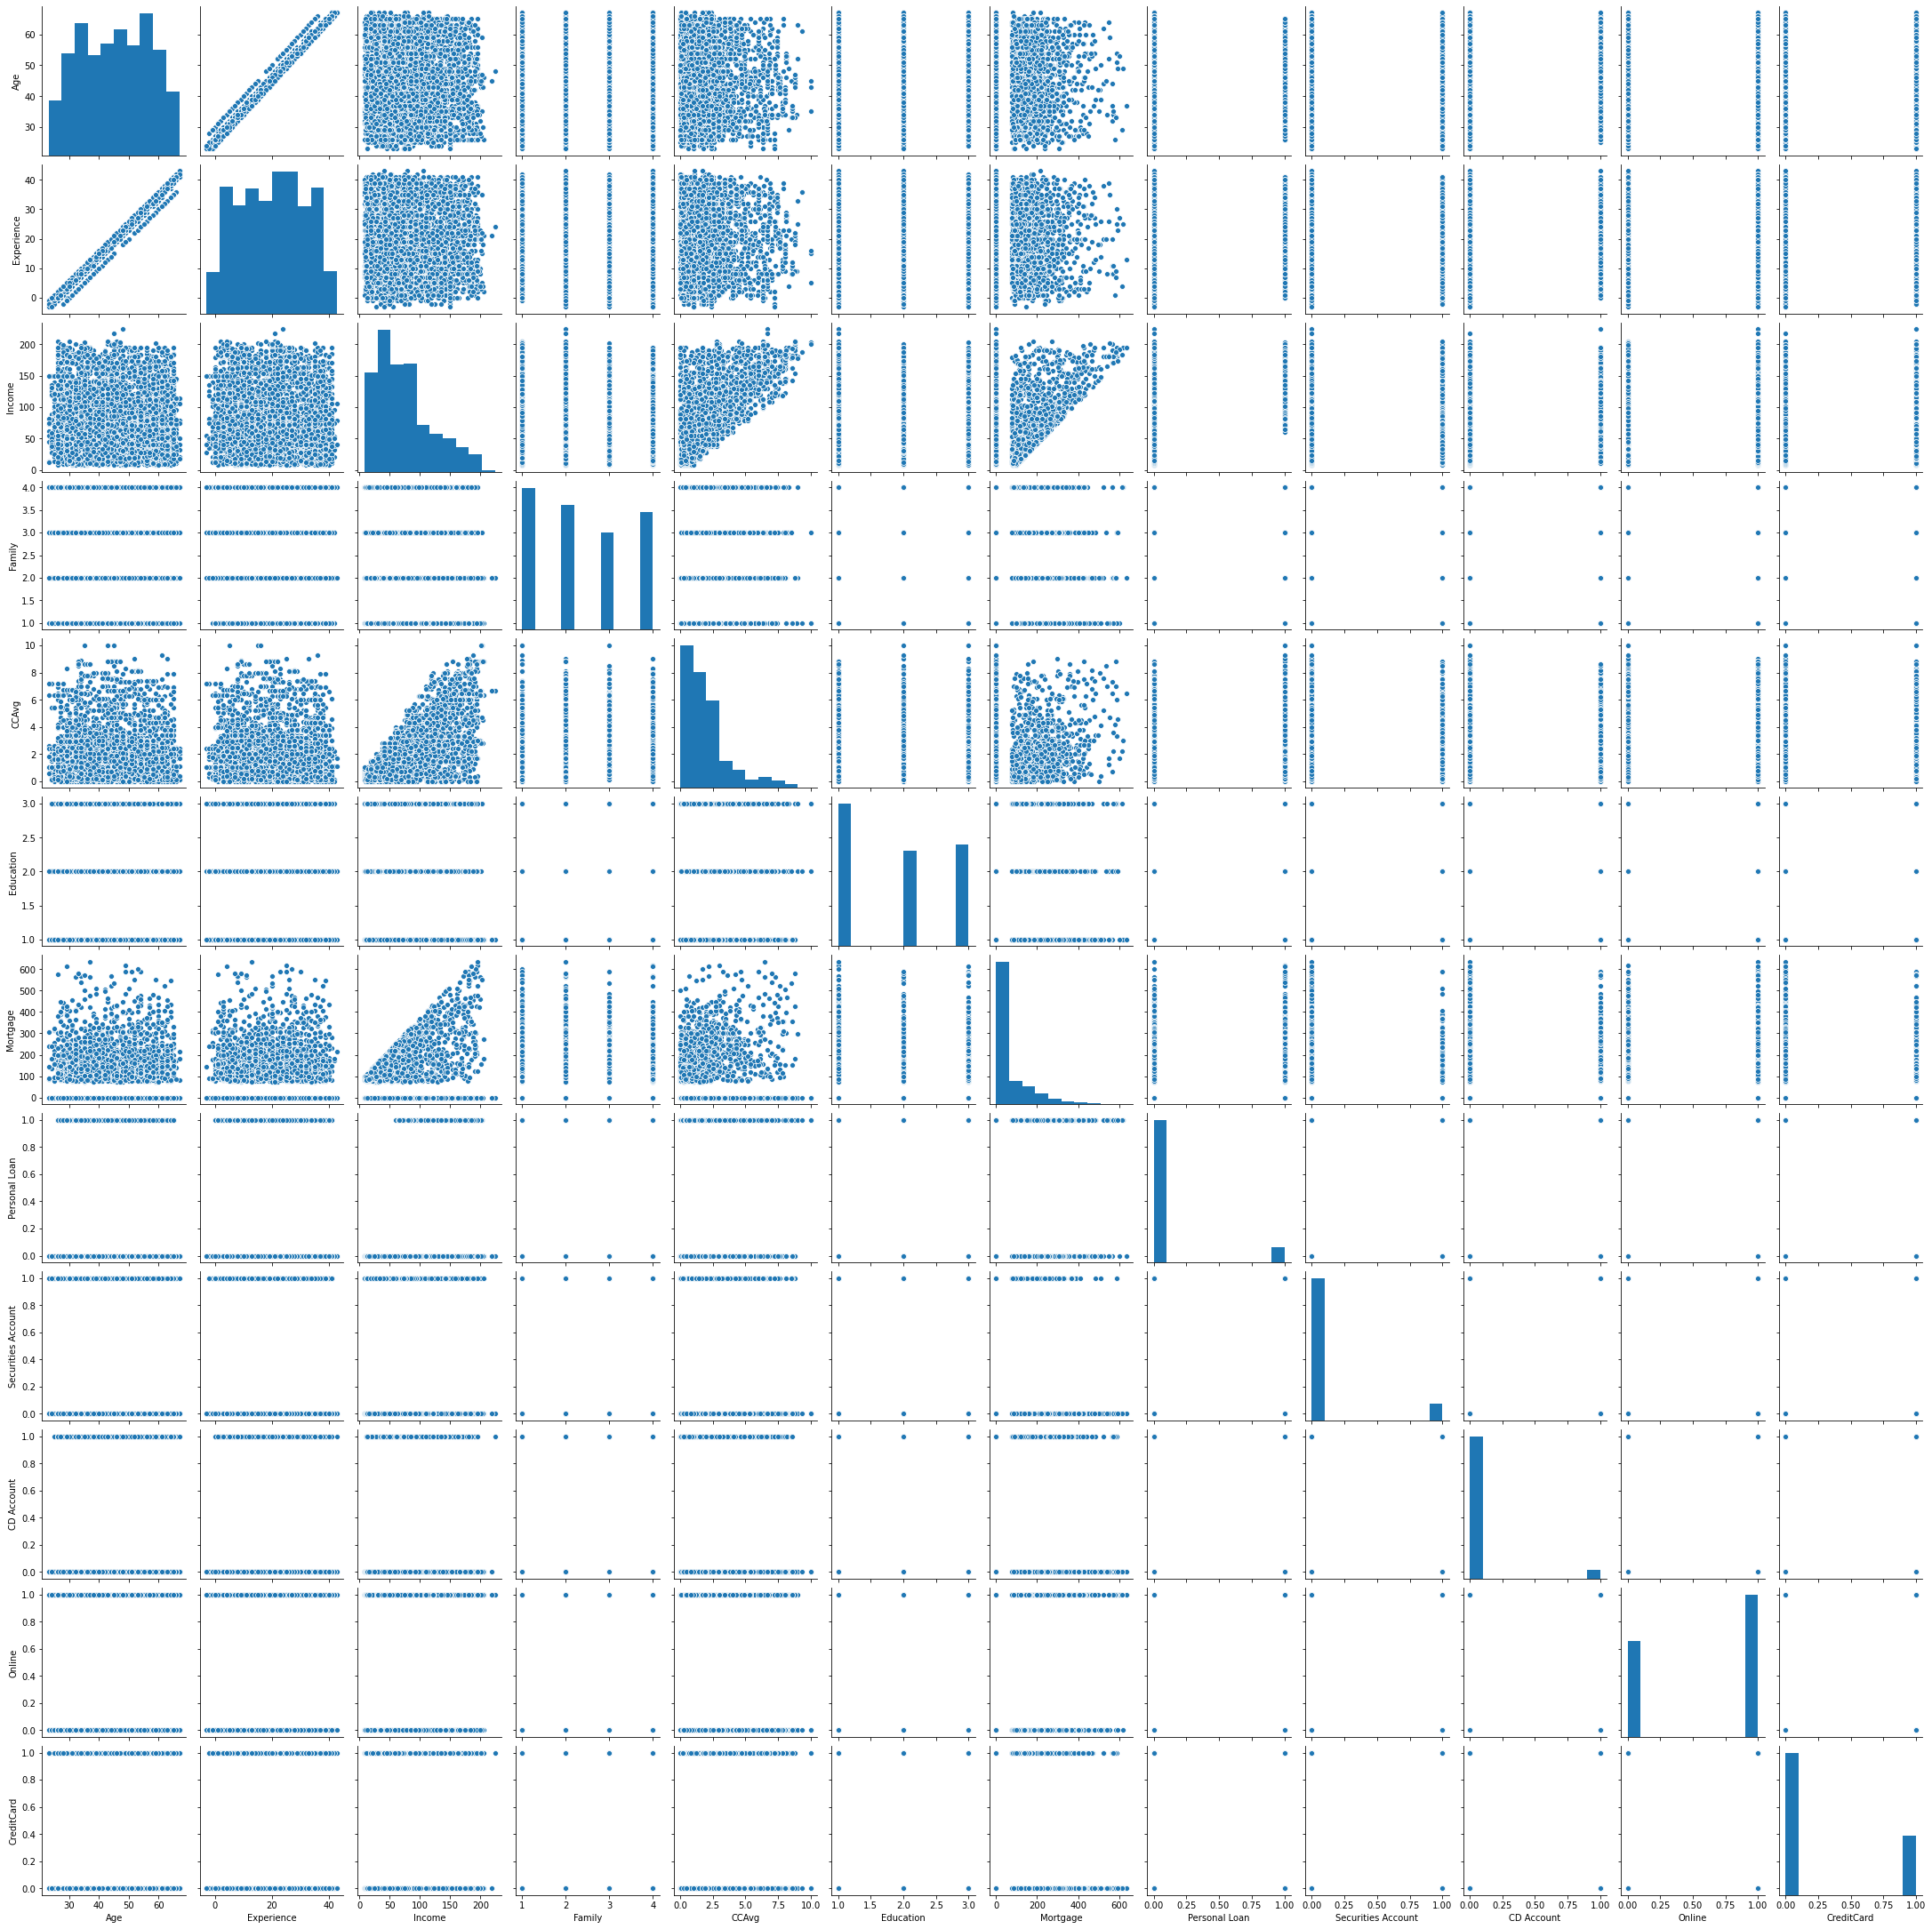

In [31]:
sns.pairplot(logit_Data)

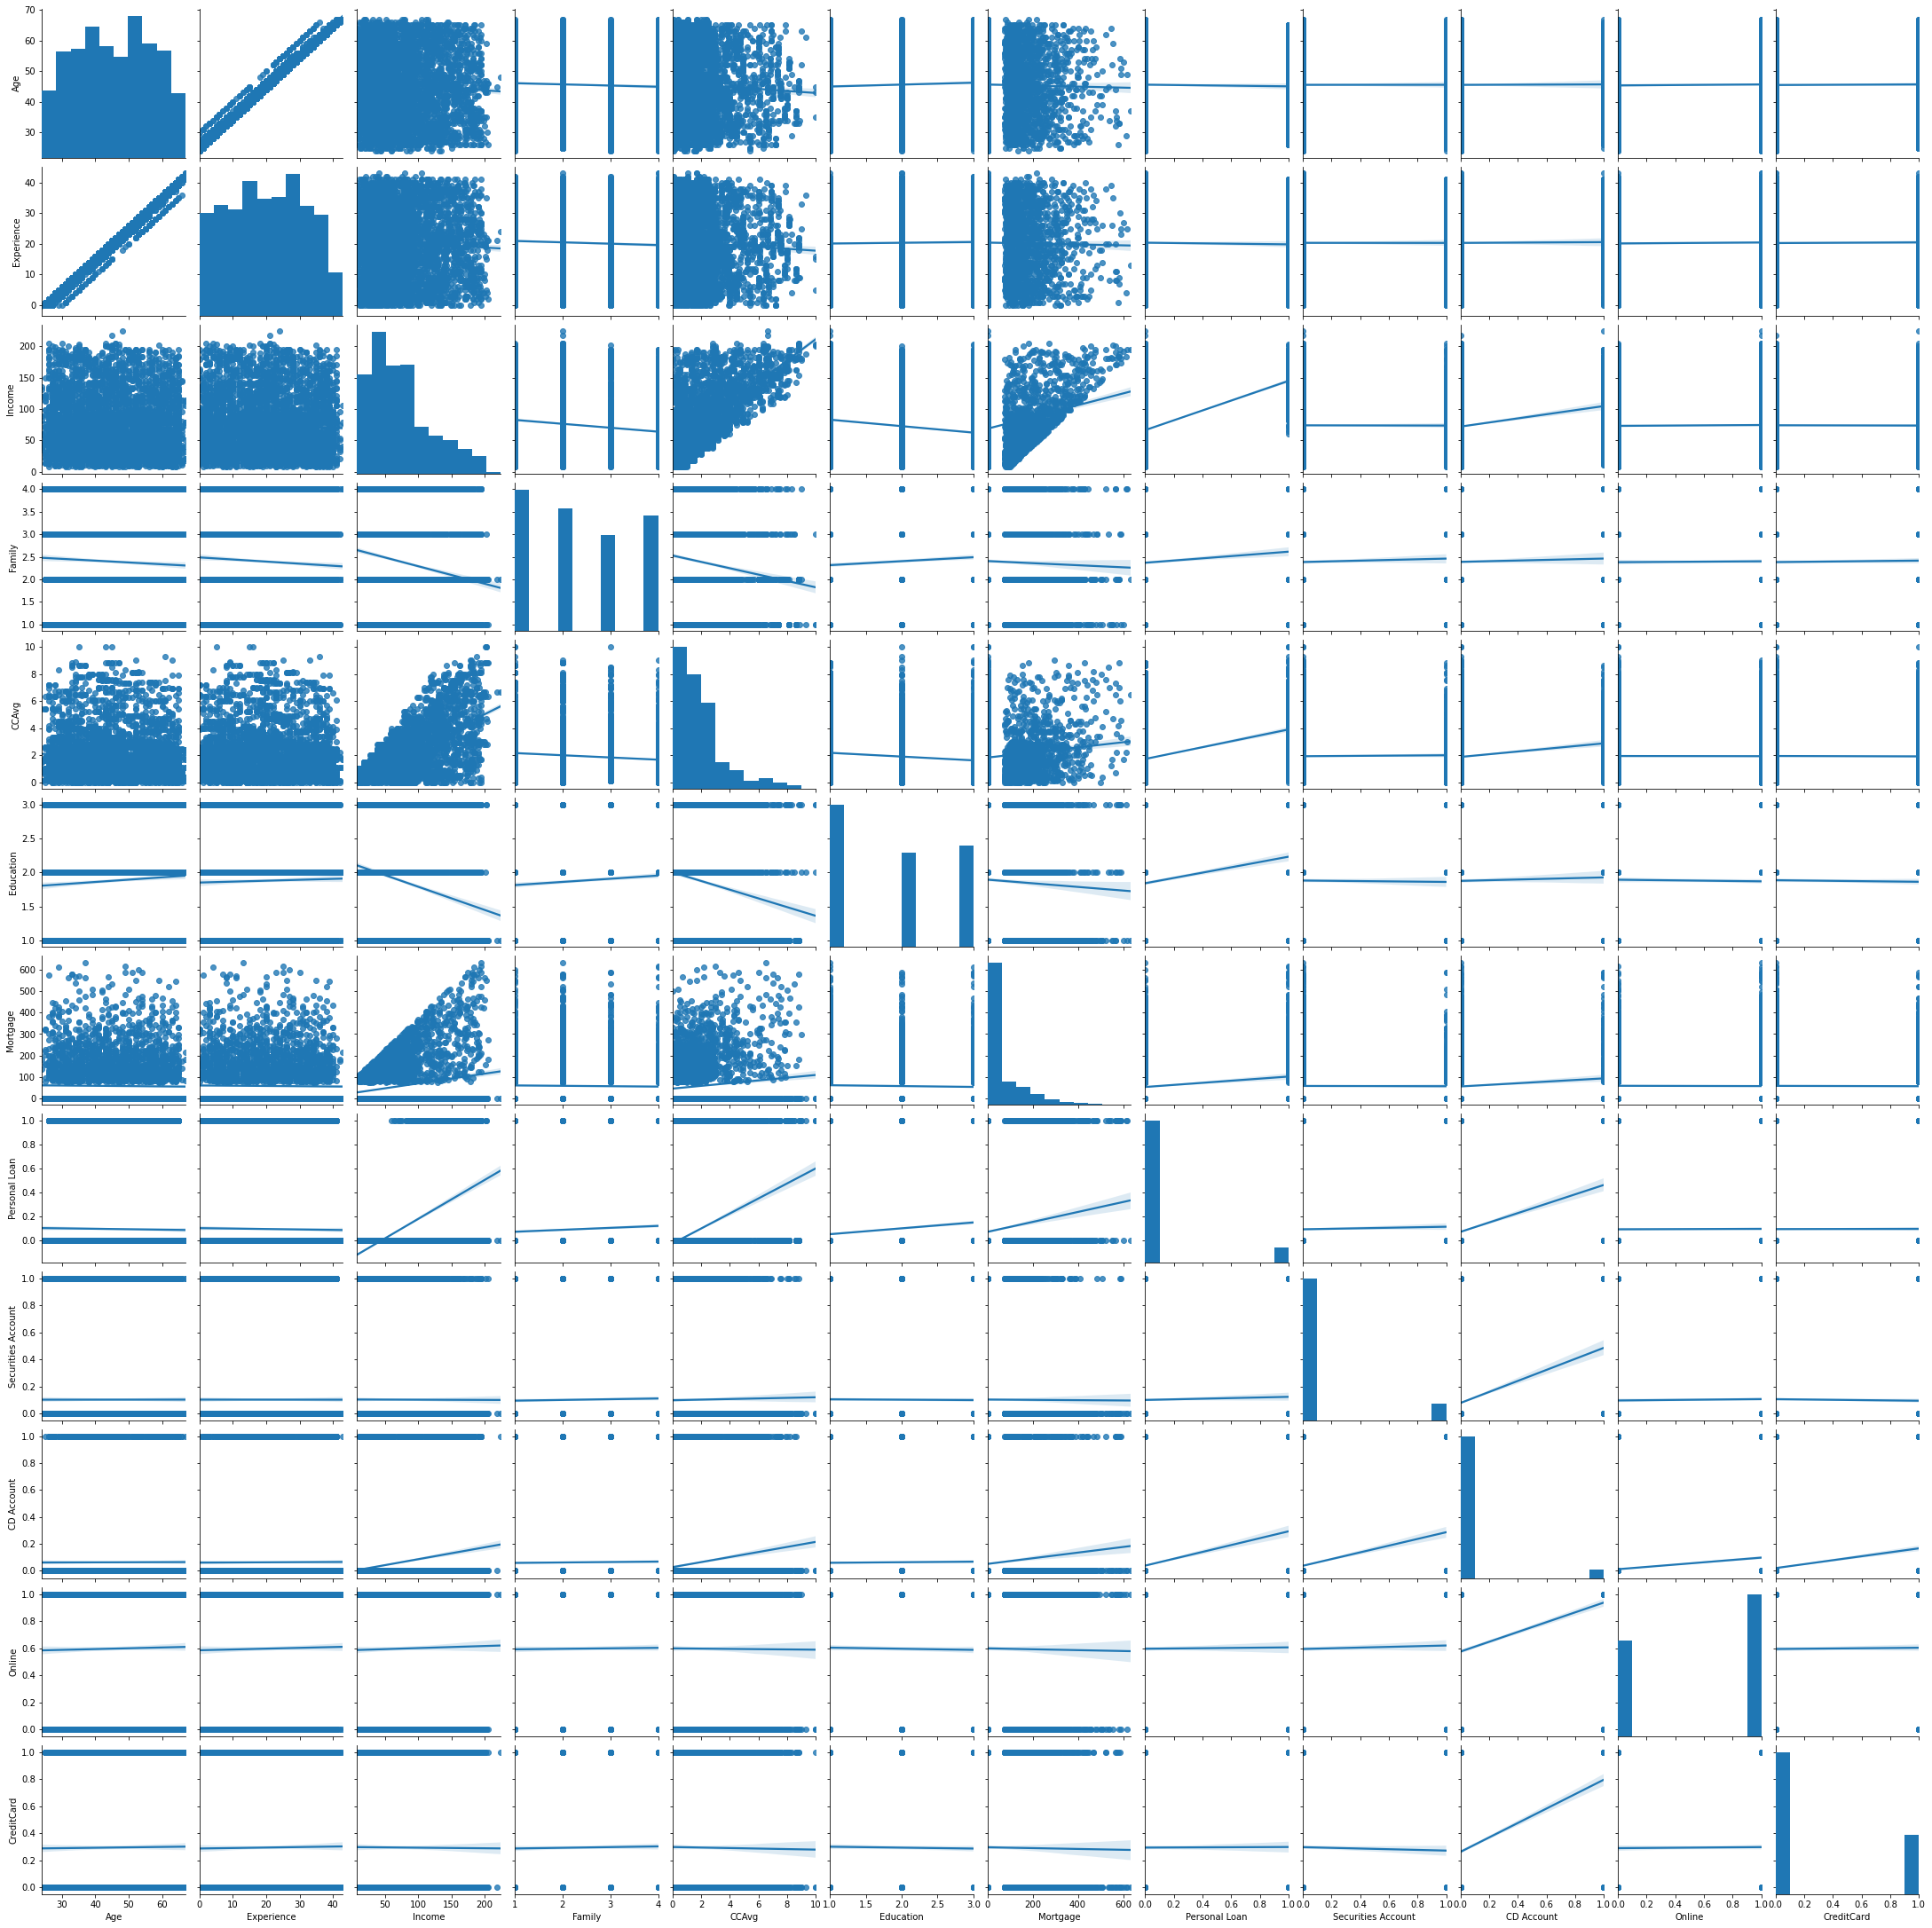

In [117]:
g = sns.pairplot(logit_Data, kind="reg")

In [33]:
logit_Data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [118]:
logit_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
Age                   4948 non-null int64
Experience            4948 non-null int64
Income                4948 non-null int64
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Mortgage              4948 non-null int64
Personal Loan         4948 non-null int64
Securities Account    4948 non-null int64
CD Account            4948 non-null int64
Online                4948 non-null int64
CreditCard            4948 non-null int64
dtypes: float64(1), int64(11)
memory usage: 630.5 KB


In [119]:
logit_Data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.0000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.9359,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.7477,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.7000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.5000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.6000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.0000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
x =logit_Data[['Age', 'Experience', 
                          'Income', 'Family', 'CCAvg', 
                          'Education', 'Securities Account', 'CD Account','Online', 'CreditCard']]
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,1,0,0,0
1,45,19,34,3,1.5,1,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,1


In [121]:
x.describe()

,Age,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.0000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.9359,1.878941,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.7477,0.839745,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.7000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.5000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.6000,3.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.0000,3.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
y = logit_Data['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [123]:
import statsmodels.api as sm

In [124]:
x1 = sm.add_constant(x)

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [125]:
logistic = sm.Logit(y,x1)

In [126]:
results = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.129084
         Iterations 9


In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4948
Model:                          Logit   Df Residuals:                     4937
Method:                           MLE   Df Model:                           10
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.5947
Time:                        21:56:34   Log-Likelihood:                -638.71
converged:                       True   LL-Null:                       -1575.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.3100      1.636     -7.526      0.000     -15.516      -9.104
Age                   -0.0481      0.061     -0.791      0.429      -0.167       0.071
Experience             0.0557      0.061      0.920      0.358      -0.063       0.174
Income                 0.0550      0.003     20.991      0.000       0.050       0.060
Family                 0.7092      0.075      9.492      0.000       0.563       0.856
CCAvg                  0.1185      0.040      2.995      0.003       0.041       0.196
Education              1.7414      0.115     15.107      0.000       1.515       1.967
Securities Account    -0.9456      0.286     -3.310      0.001      -1.506      -0.386
CD Account             3.8079      0.324     11.758      0.000       3.173       4.443
Online                -0.6652      0.157     -4.233      0.000      -0.973      -0.357
CreditCard            -1.0980      0.205     -5.347      0.000      -1.501      -0.696
======================================================================================
"""

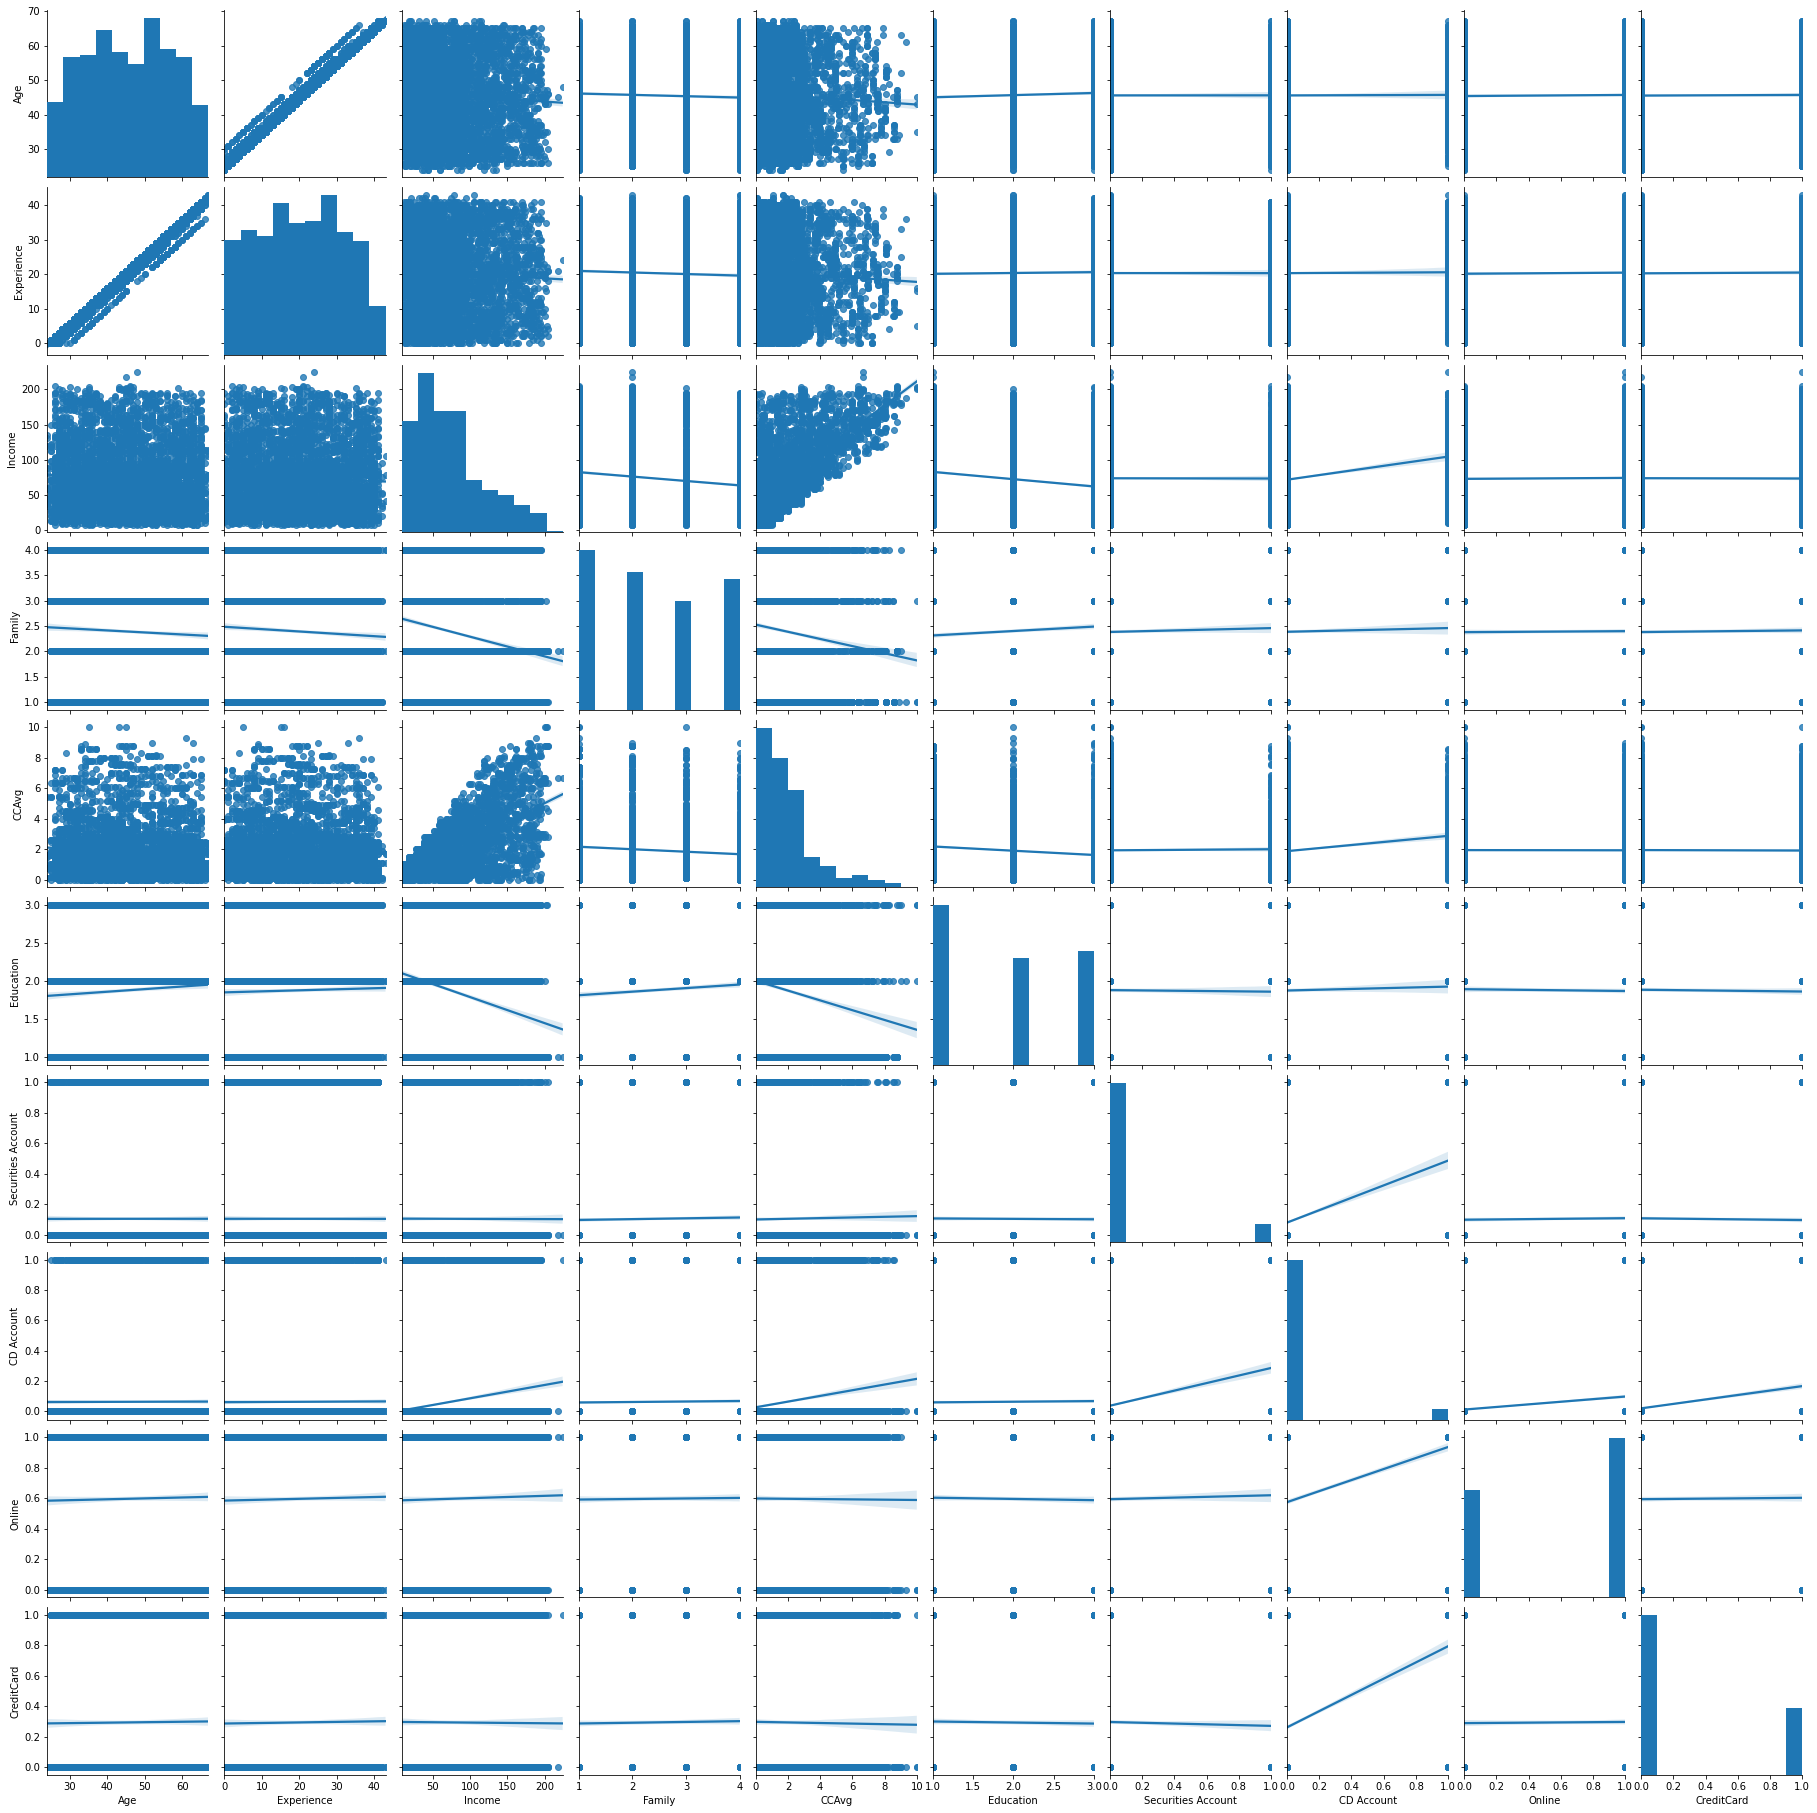

In [128]:
sns.pairplot(x, kind="reg")

In [129]:
x =logit_Data[['Age', 'Experience', 
                          'Income', 'Family', 'CCAvg', 
                          'Education', 'Securities Account', 'CD Account','Online', 'CreditCard']]
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,1,0,0,0
1,45,19,34,3,1.5,1,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,1


In [130]:
y = logit_Data['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [136]:
x_train.shape

(3958, 10)

In [137]:
y_train.shape

(3958,)

In [148]:
from sklearn.linear_model import LogisticRegression

In [161]:
logisticRegr = LogisticRegression()

In [162]:
logisticRegr.fit(x_train, y_train)

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
YPred = pd.DataFrame(np.array(logisticRegr.predict(x_test)),columns=["Predicted"])

In [182]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9535353535353536


In [183]:
predictions = logisticRegr.predict(x_test)

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [185]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[889   9]
 [ 37  55]]


In [187]:
YPred = pd.DataFrame(np.array(logisticRegr.predict(x_test)),columns=["Predicted"])

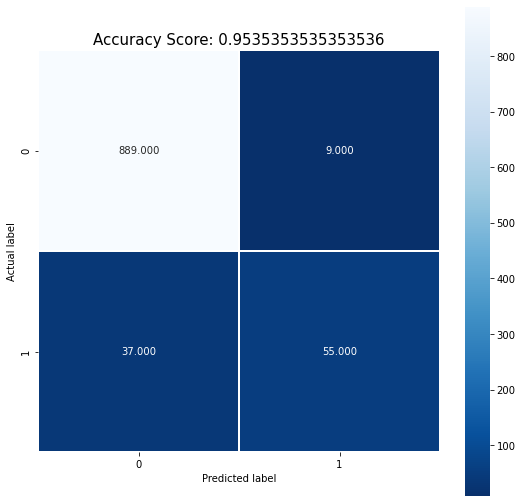

In [190]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);